In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.externals import joblib

import spdivik.summary as smr
smr.scale_plot_size(4.)

In [2]:
root = r"C:\Users\Grzegorz\Desktop\thyroid-cancer-cores-merged-all"
result_path = os.path.join(root, "divik-result-master.jbl")
metadata_path = os.path.join(root, "metadata.csv")

In [3]:
metadata = pd.read_csv(metadata_path)
result = joblib.load(result_path)

In [4]:
smr.depth(result)

11

In [5]:
smr.total_number_of_clusters(result)

52

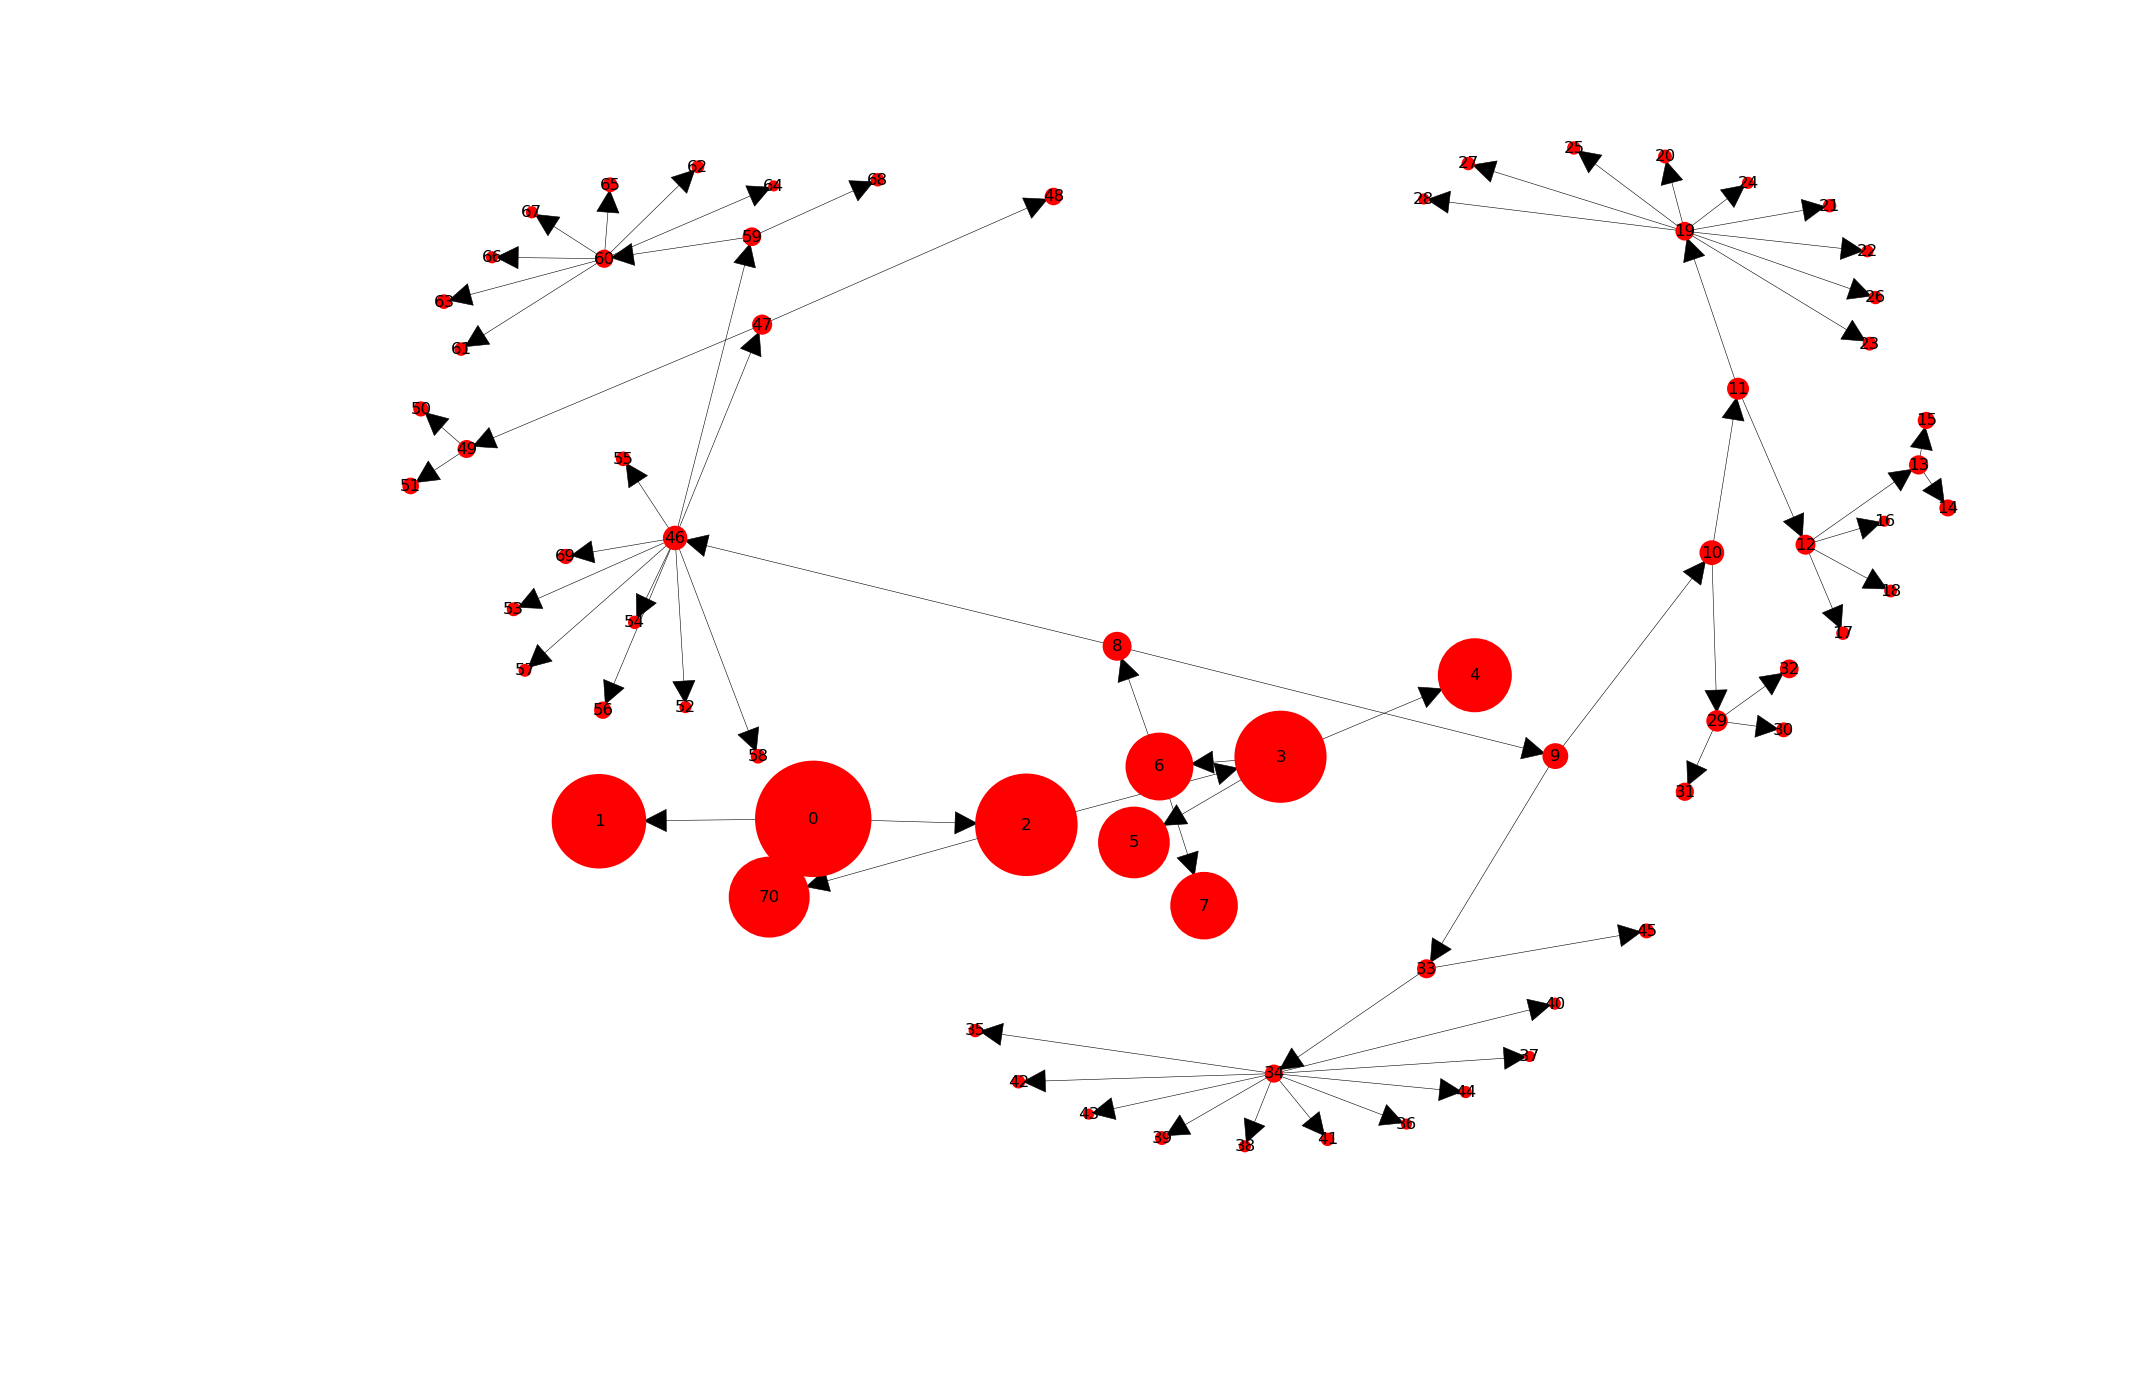

In [6]:
smr.plot(result)

In [7]:
def as_image(labels, x, y):
    x, y = np.array(x), np.array(y)
    x, y = x - x.min() + 1, y - y.min() + 1
    image = np.nan * np.zeros((y.max() + 1, x.max() + 1))
    image[y, x] = labels
    return image

['?' '????' 'ATC' 'FA' 'FAC' 'FTC' 'MTC' 'N' 'PTC' 'PTCCV' 'PTCFV']


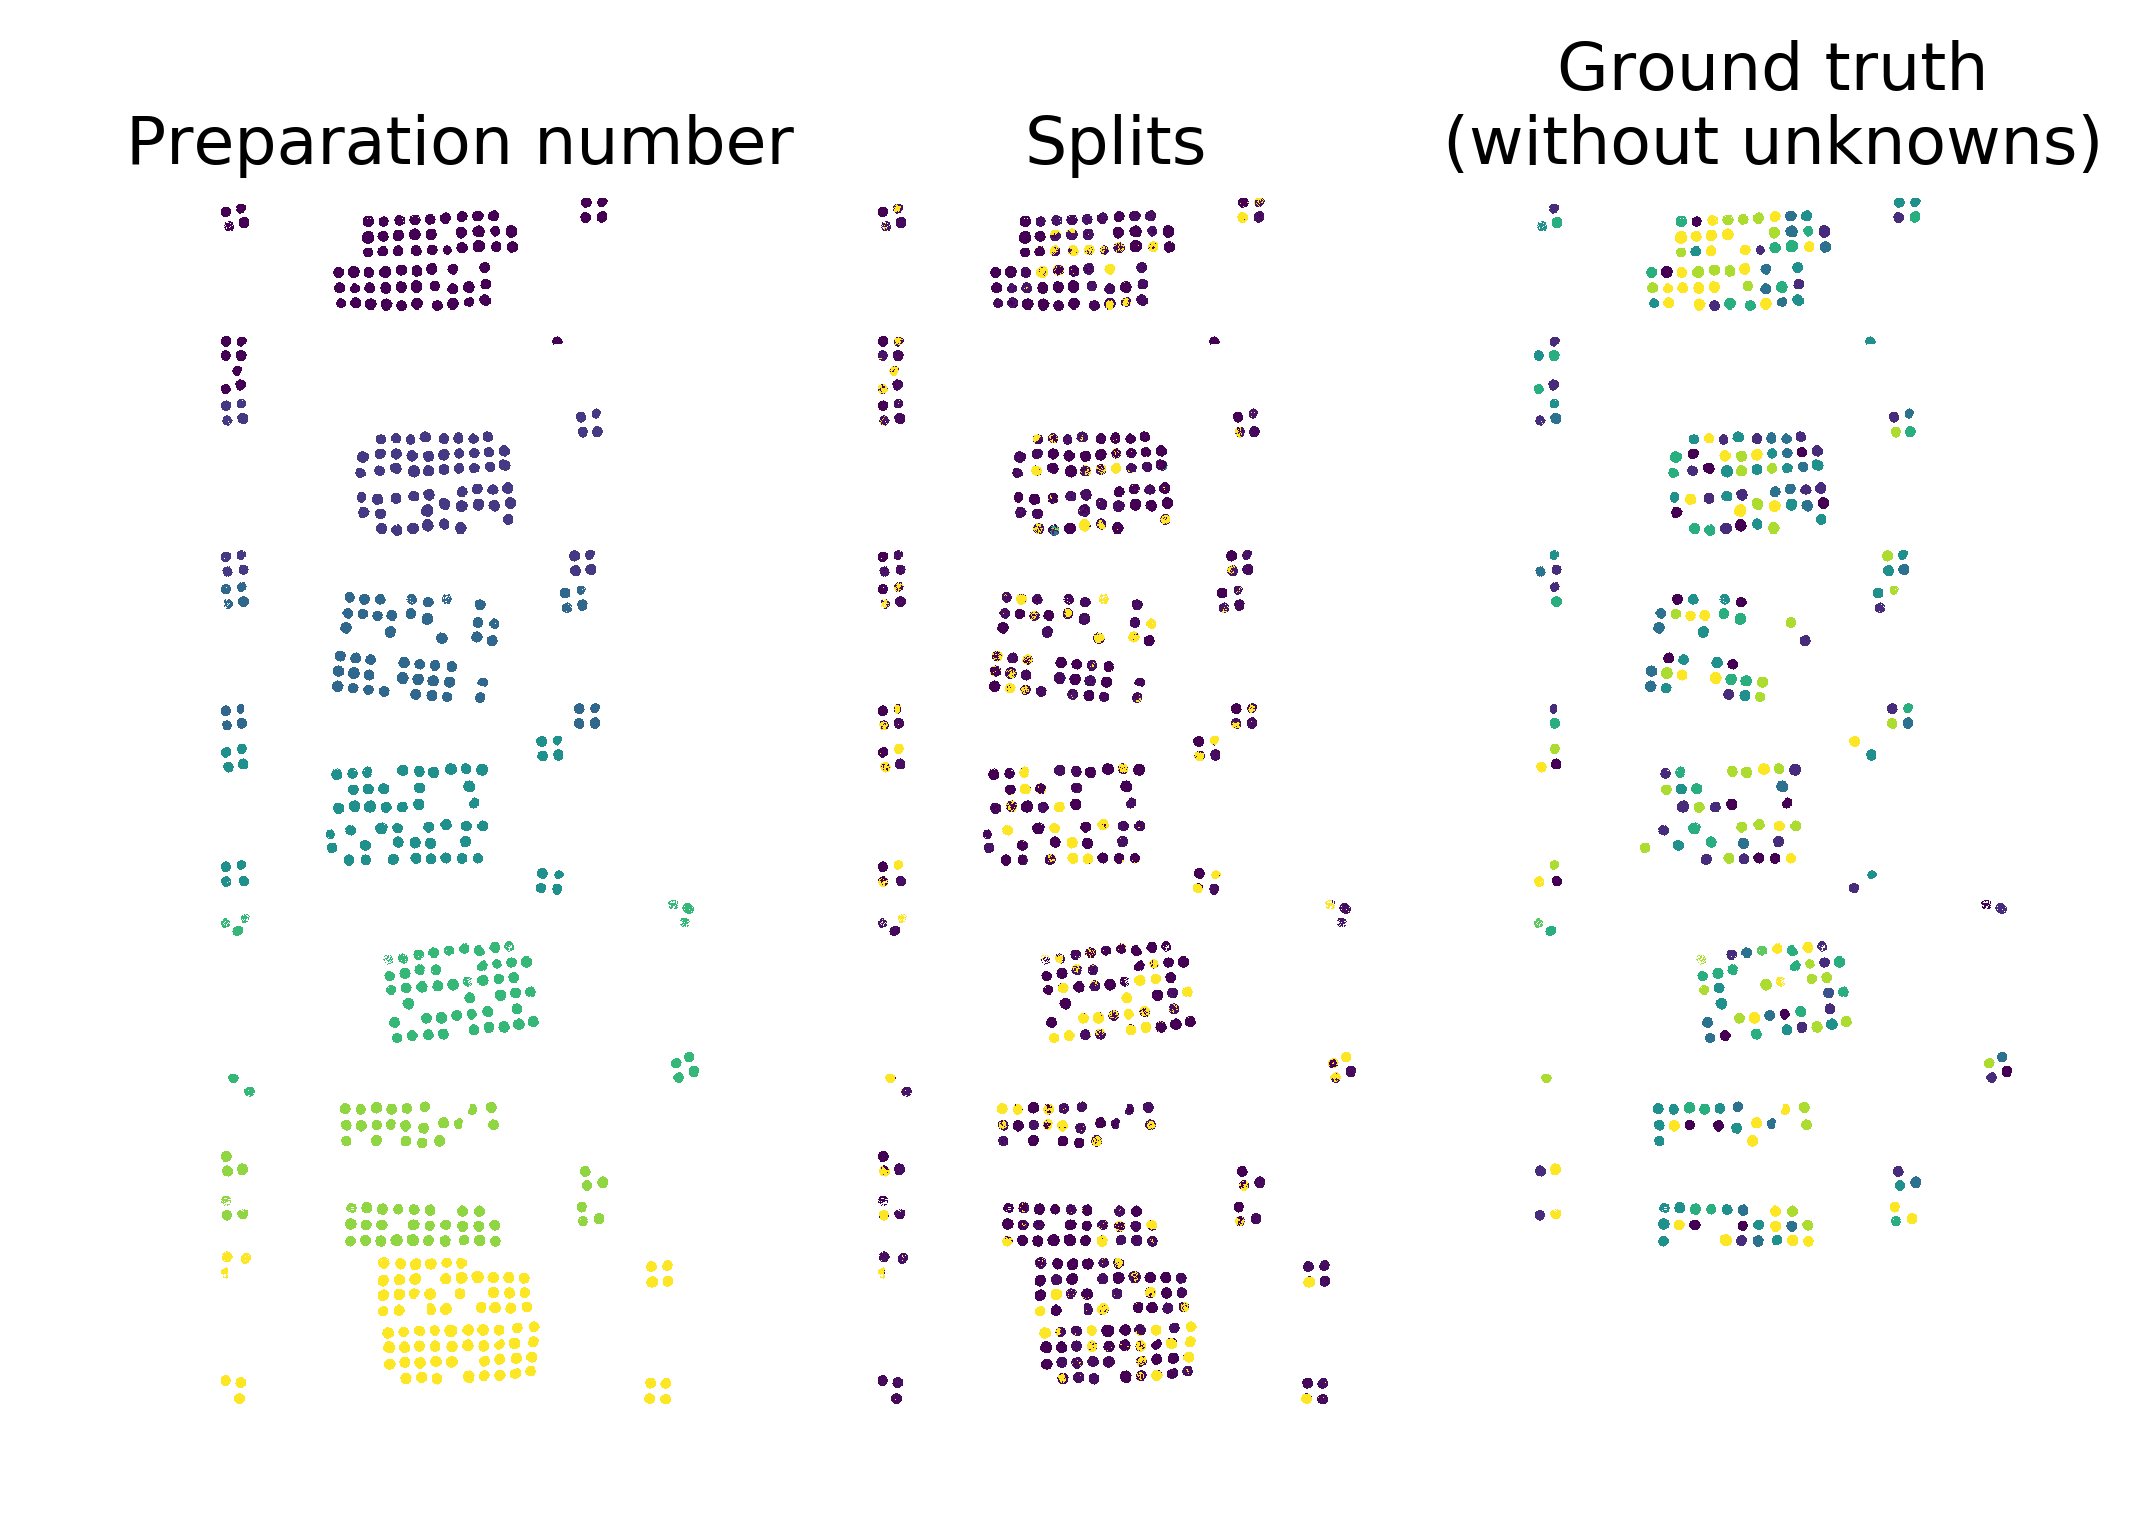

In [8]:
preparations = as_image(metadata.dataset, metadata.X, metadata.Y)

figure, axes = plt.subplots(1, 3)
axes[0].imshow(preparations)
axes[0].axis('off')
axes[0].set_title('Preparation number')

merged = smr.merged_partition(result)
# topmost = as_image(result.partition, metadata.X, metadata.Y)
topmost = as_image(merged, metadata.X, metadata.Y)

axes[1].imshow(topmost)
axes[1].axis('off')
axes[1].set_title('Splits')

diagnoses = np.unique(metadata.diagnosis)
print(diagnoses)
numerical_diagnosis = np.argmax(diagnoses[np.newaxis, :] == metadata.diagnosis[:, np.newaxis], axis=1).astype(float)
numerical_diagnosis[np.logical_or(metadata.diagnosis == '?', metadata.diagnosis == '????')] = np.nan
ground_truth = as_image(numerical_diagnosis, metadata.X, metadata.Y)
axes[2].imshow(ground_truth)
axes[2].axis('off')
axes[2].set_title('Ground truth\n(without unknowns)')

plt.show()

In [9]:
smr.statistic(merged, metadata.diagnosis, smr.dice)

,?,????,ATC,FA,FAC,FTC,MTC,N,PTC,PTCCV,PTCFV
0,0.355739,0.000061,0.089987,0.160494,0.000394,0.146090,0.154182,0.167303,0.008790,0.168930,0.208567
1,0.193582,0.000000,0.087515,0.089807,0.004446,0.124986,0.098238,0.176509,0.000424,0.120506,0.127219
2,0.226001,0.025677,0.108007,0.096820,0.017558,0.095167,0.134936,0.070296,0.000389,0.061080,0.091692
3,0.089041,0.006190,0.053226,0.101428,0.010623,0.065267,0.193748,0.074651,0.028472,0.120234,0.153638
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002367,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002498,0.000000,0.000000,0.000000
6,0.000039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000526,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000658,0.000000,0.000000,0.000000


In [10]:
smr.statistic(merged, metadata.diagnosis, smr.positive_predictive_value)

,?,????,ATC,FA,FAC,FTC,MTC,N,PTC,PTCCV,PTCFV
0,0.316113,0.000030,0.051067,0.099225,0.000198,0.086496,0.099058,0.103001,0.004431,0.106716,0.133665
1,0.311045,0.000000,0.060578,0.075149,0.002255,0.095269,0.088981,0.146394,0.000217,0.105459,0.114652
2,0.400568,0.013061,0.077870,0.085897,0.008924,0.076275,0.130415,0.061768,0.000199,0.056882,0.088140
3,0.191294,0.003165,0.041850,0.101589,0.005425,0.058125,0.213963,0.073947,0.014725,0.127293,0.168626
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
6,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [11]:
smr.statistic(merged, metadata.diagnosis, smr.true_positive_rate)

,?,????,ATC,FA,FAC,FTC,MTC,N,PTC,PTCCV,PTCFV
0,0.406723,0.005747,0.378342,0.419558,0.039394,0.469698,0.347636,0.445300,0.546992,0.405098,0.474412
1,0.140518,0.000000,0.157586,0.111569,0.157576,0.181645,0.109645,0.222222,0.009398,0.140562,0.142880
2,0.157404,0.752874,0.176199,0.110925,0.542424,0.126499,0.139781,0.081556,0.007519,0.065946,0.095542
3,0.058025,0.140805,0.073096,0.101268,0.254545,0.074411,0.177024,0.075369,0.428571,0.113917,0.141097
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001185,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001251,0.000000,0.000000,0.000000
6,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000263,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000193,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000329,0.000000,0.000000,0.000000
